In [1]:
#Step 1: Load and Explore the Dataset (EDA)
#1. Load the data

In [8]:
import pandas as pd

# Load dataset
df = pd.read_excel("mushroom.xlsx")
print(df.head())
print(df.info())
print(df.describe())
print(df.isnull().sum())


   Unnamed: 0 cap_shape cap_surface cap_color bruises   odor gill_attachment  \
0        1167    sunken       scaly     white      no  anise      descending   
1        1037    sunken     fibrous       red      no  anise         notched   
2         309      flat     grooves    purple     yes   foul      descending   
3         282      bell       scaly      pink     yes  fishy         notched   
4         820      flat      smooth    yellow     yes  musty            free   

  gill_spacing gill_size gill_color  ...  veil_type veil_color ring_number  \
0      distant     broad       pink  ...    partial      brown         two   
1      crowded    narrow  chocolate  ...  universal      brown         two   
2      crowded     broad     purple  ...  universal     yellow         two   
3        close     broad     orange  ...    partial     yellow         two   
4      crowded    narrow     orange  ...  universal      white        none   

   ring_type spore_print_color population  habitat

In [10]:
#2. Basic EDA

#Class distribution

In [12]:
print(df['class'].value_counts())


class
poisonous    1400
edible        600
Name: count, dtype: int64


In [14]:
#Histograms

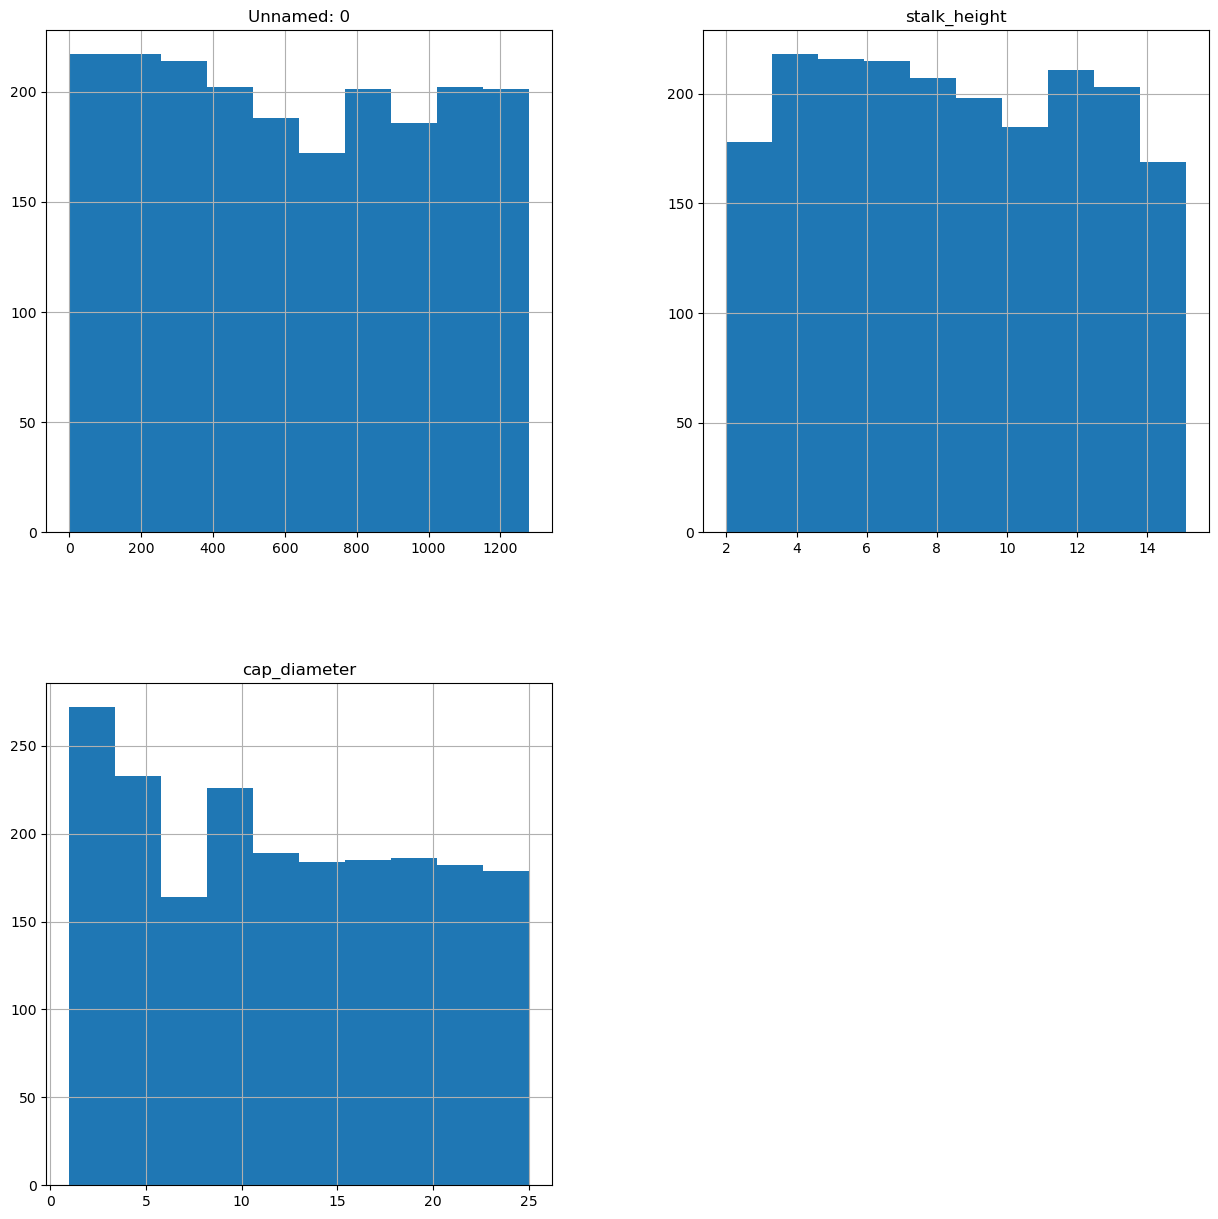

In [16]:
import matplotlib.pyplot as plt
df.hist(figsize=(15,15))
plt.show()


In [18]:
#Boxplots / Density plots for numerical columns:

C:\Users\Anjali\AppData\Local\Temp\ipykernel_7480\358170299.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['cap_diameter'], shade=True)


<Axes: xlabel='class', ylabel='cap_diameter'>

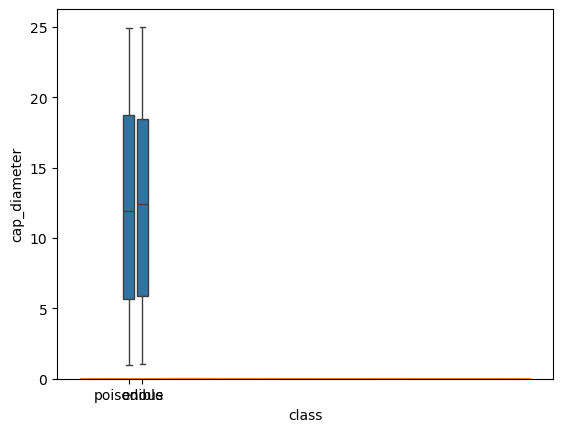

In [20]:
import seaborn as sns
sns.boxplot(x='class', y='cap_diameter', data=df)
sns.kdeplot(df['cap_diameter'], shade=True)


In [22]:
#Correlation matrix (only for numeric features):

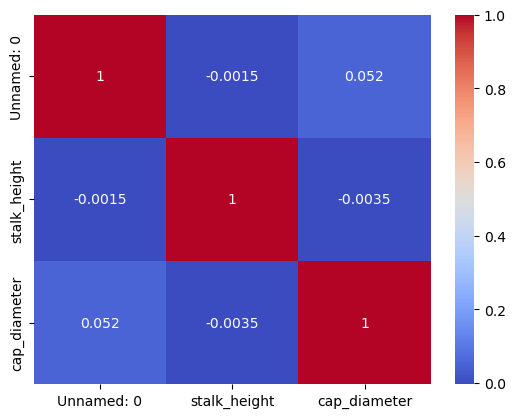

In [24]:
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()


In [26]:
#Step 2: Data Preprocessing

#Encode categorical variables
#Since most features are categorical, use Label Encoding:

In [28]:
from sklearn.preprocessing import LabelEncoder

df_encoded = df.copy()
for col in df.columns:
    if df[col].dtype == 'object':
        le = LabelEncoder()
        df_encoded[col] = le.fit_transform(df_encoded[col])


In [30]:
#2. Split data into train & test

In [32]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop('class', axis=1)
y = df_encoded['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [34]:
#Step 3: Visualization

#Pairplot (subset of features for performance):

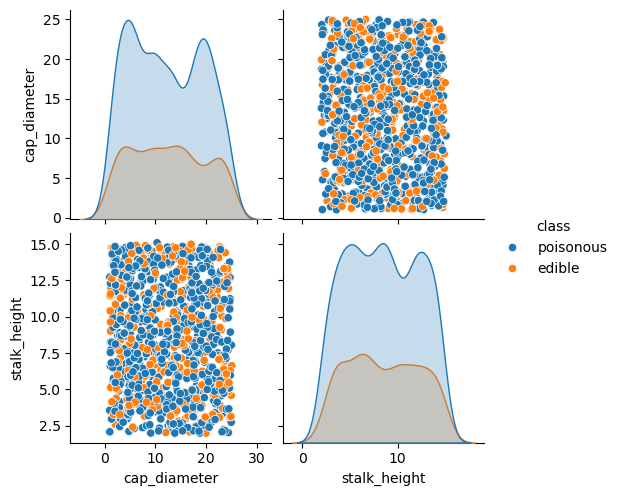

In [36]:
sns.pairplot(df, hue='class', vars=['cap_diameter', 'stalk_height'])
plt.show()


In [38]:
#Class distribution (check balance):

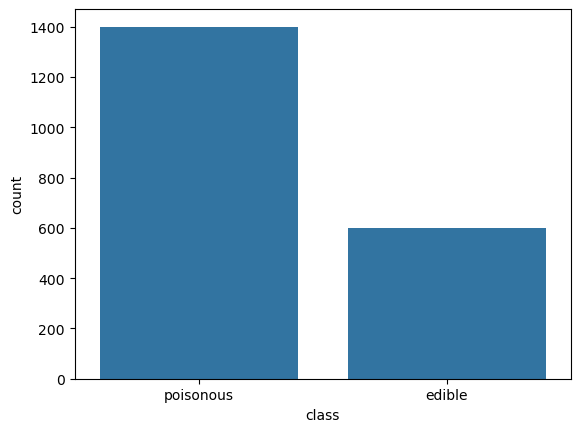

In [40]:
sns.countplot(x='class', data=df)
plt.show()


In [42]:
#Step 4: Implement SVM

In [44]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Basic SVM model with RBF kernel
model = SVC(kernel='rbf')
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.6675
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       133
           1       0.67      1.00      0.80       267

    accuracy                           0.67       400
   macro avg       0.33      0.50      0.40       400
weighted avg       0.45      0.67      0.53       400

[[  0 133]
 [  0 267]]


C:\Users\Anjali\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Anjali\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Anjali\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [46]:
#Step 5: Visualize SVM Results

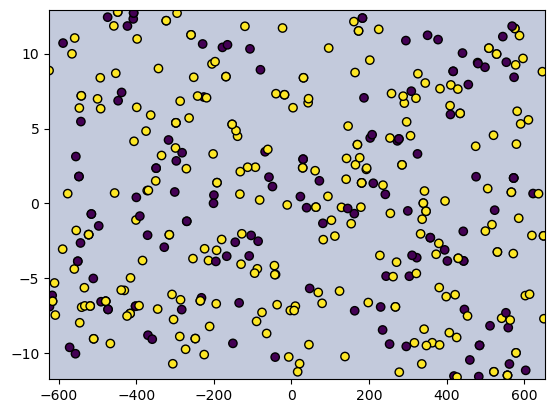

In [48]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Train SVM on 2D PCA space
X_train_pca, X_test_pca, _, _ = train_test_split(X_pca, y, test_size=0.2, random_state=42)

model_pca = SVC(kernel='rbf')
model_pca.fit(X_train_pca, y_train)

# Plot decision boundary
import numpy as np

xx, yy = np.meshgrid(np.linspace(X_pca[:,0].min(), X_pca[:,0].max(), 500),
                     np.linspace(X_pca[:,1].min(), X_pca[:,1].max(), 500))

Z = model_pca.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X_test_pca[:,0], X_test_pca[:,1], c=y_test, edgecolors='k')
plt.show()


In [49]:
#Step 6: Parameter Tuning (Hyperparameter Optimization)

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [1, 0.1, 0.01],
    'kernel': ['linear', 'rbf', 'poly']
}

grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=2)
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
print("Best Score:", grid.best_score_)


Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time= 1.5min
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time= 2.5min
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time= 2.0min
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time= 1.8min
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time= 1.4min
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s


In [ ]:
#Step 7: Compare Different Kernels

In [ ]:
kernels = ['linear', 'poly', 'rbf']
for k in kernels:
    model = SVC(kernel=k)
    model.fit(X_train, y_train)
    print(f"Kernel: {k}")
    print("Accuracy:", model.score(X_test, y_test))


In [ ]:
#Step 8: Analysis & Practical Implications

Strengths: Handles non-linear data well (RBF), good accuracy for classification tasks.

Weaknesses: Slow on large datasets, needs parameter tuning.

Practical use: Medical diagnosis, fraud detection, text classification.